<hr/>

# Data Mining

<hr/>

<h2><font color="darkblue">Exam 1</font></h2>

#### Deadline
Submit by 1:15pm on Blackboard. Don't wait till the last minute!

####  Work alone!
Feel free to use the lecture notes and other resources but work on your own!  

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Problem 1

Analyze the attached datasets using simple descriptive statistics; discuss their similarities and differences.

1. Run the code snipet below and look at the output (1 pt)
0. Understand and provide meaningful comments for each line (4 pts)
0. Calculate these quantities for each dataset (2 pts)
0. Make plots of these datasets (2 pts)
0. Summarize the results with your own words (2 pts)

Total of 11 points

In [2]:
import pandas as pd # Import pandas to get our data

df1 = pd.read_csv('E1-Problem1-I.csv') # Load data from E1-Problem1-I.csv and save as df1
df2 = pd.read_csv('E1-Problem1-II.csv')# Load data from E1-Problem1-II.csv and save as df2
df3 = pd.read_csv('E1-Problem1-III.csv')# Load data from E1-Problem1-III.csv and save as df3

V = df1.values.T # transfer df1 into matrix, i.e. list of lists
m = V.mean(axis=1) # calculate the row mean of V, or df1
m = m[:,np.newaxis] # make m become a row vector

M = V - m # Centering the data, i.e. M = m - mean(m)
C = M.dot(M.T) / (M.shape[1] - 1) # calculate the covariance matrxi of df1
print (m) # show mean of df1
print (C) # show covariance matrix of df1
df1 # show df1

[[9.        ]
 [7.50090909]]
[[11.          5.501     ]
 [ 5.501       4.12726909]]


,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


#### Problem 1.3
Calculate these quantities for each dataset (2 pts)

In [3]:
# df2
V2 = df2.as_matrix().T 
m2 = V2.mean(axis=1) # calculate the row mean of V2, or df2
m2 = m2[:,np.newaxis] 

M2 = V2 - m2 
C2 = M2.dot(M2.T) / (M2.shape[1] - 1) # calculate the covariance matrxi of df2
print ("mean of df3 is \n",m2) # show mean of df2
print ("Covariance matrix of df3 is\n",C2) # show covariance matrix of df2
df2

mean of df3 is 
 [[9.        ]
 [7.50090909]]
Covariance matrix of df3 is
 [[11.          5.5       ]
 [ 5.5         4.12762909]]


/Users/AkilanMeiyappan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,x,y
0,10.0,9.14
1,8.0,8.14
2,13.0,8.74
3,9.0,8.77
4,11.0,9.26
5,14.0,8.10
6,6.0,6.13
7,4.0,3.10
8,12.0,9.13
9,7.0,7.26


In [4]:
#df3
V3 = df3.as_matrix().T 
m3 = V3.mean(axis=1) # calculate the row mean of V3, or df3
m3 = m3[:,np.newaxis] 
M3 = V3 - m3 
C3 = M3.dot(M3.T) / (M3.shape[1] - 1) # calculate the covariance matrxi of df3
print ("mean of df3 is \n",m3) # show mean of df3
print ("Covariance matrix of df3 is\n",C3) # show covariance matrix of df3
df3

mean of df3 is 
 [[9. ]
 [7.5]]
Covariance matrix of df3 is
 [[11.       5.497  ]
 [ 5.497    4.12262]]


/Users/AkilanMeiyappan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,x,y
0,10.0,7.46
1,8.0,6.77
2,13.0,12.74
3,9.0,7.11
4,11.0,7.81
5,14.0,8.84
6,6.0,6.08
7,4.0,5.39
8,12.0,8.15
9,7.0,6.42


#### Problem 1.4
Make plots of these datasets (2 pts)

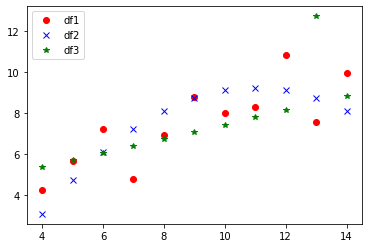

In [5]:
plt.plot(V[0,:],V[1,:],'ro',V2[0,:],V2[1,:],'bx',V3[0,:],V3[1,:],'g*', )
legend(['df1','df2','df3'])

#### Problem1.5
Summarize the results with your own words (2 pts)
#### Answer: 
For these three datasets, although the data in different datasets are quiet different, they have the almost same mean for each column, that is \[9.0, 7.5\], and very close covariance matrix, which is around
\begin{bmatrix}
    11.0       & 5.5\\
    5.5      & 4.13 \\
\end{bmatrix}
Also, we can read that result from the plot. The data from different datasets have almost same tendency, although df1 is more like randomly distributed around df3 and df2 shows like a quadratic function and df3 have the neat data with only one outlier.

### Problem 2

The attached [CSV](E1-Problem2.csv) file contains a number measurements. Considering that the measurements are expensive to perform, a student decided to estimate the relation of the two quantities and estimate the missing measurements.

1. Run and comment the code (3 pts)
0. Describe the method that the program implements and the underlying assumptions (2 pts)
0. What is the family of functions the student considered? What is the formula? (2 pts) 
0. What would be a better formula to use and why? (2 pts)
0. Change the code to implement your proposal and rerun the analysis (3 pts)
0. What value of *n* would be your preference and why? (2 pts)

Total of 14 points

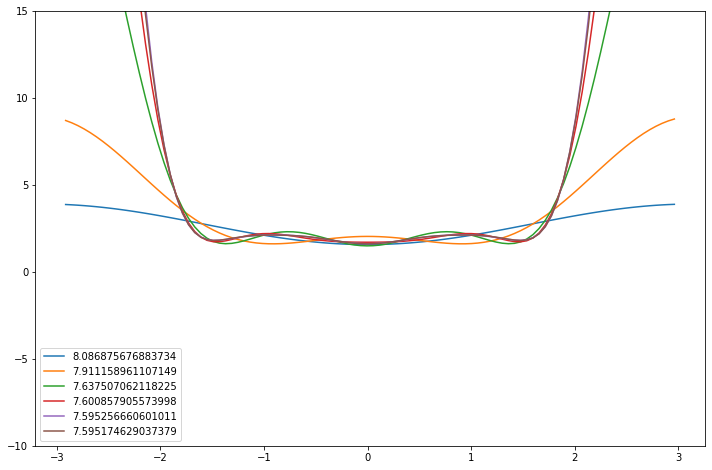

In [8]:
df = pd.read_csv("E1-Problem2.csv") # read data from E1-Problem2.csv and saved as df
plt.figure(figsize=(12,8)) # set the figure size
#plt.scatter(df.x, df.y, c='k', label='data') # draw the scatter picture, df.x as x axis and df.y as y.axis, color is black, lable name is "data"

def ser(x, n): # define a function named ser which has two variables, x and n
    X = np.ones( (x.size, n+1) ) # X is the one matrix with size of x rows and  n+1 colnums
    for i in range(1, n+1): # for loop from 1 to n
        X[:,i] = np.cos(i * x) # the i th colnum = cos(i*x)
    return X # return X
    
xmin, xmax = df.x.min(), df.x.max() # calculate the min and max of df.x
x = np.linspace(xmin-1, xmax+1, 100)  # divide [xmin-1, xmax+1] evenly into 100 segement saved as x

for n in range(1,7): # for loop, n from 1 to 6
    X = ser(df.x, n) #  call the function ser with x=df.x and n=n
    b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(df.y) # using least square to estimate the coffeicient
    mse = np.square(X.dot(b)-df.y).mean() # calculatet the Mean squared error
    y = ser(x,n).dot(b) # generate the predicted value
    plt.plot(x, y, '-', label=mse); # plot the prediction
    
plt.ylim(-10,15) # set y axis from -10 to 15
plt.legend(); # show the legend

#### Problem2.2
Describe the method that the program implements and the underlying assumptions (2 pts)
#### Answer: 
This method use the linear combination of some kind of function to approximate the data, and form a model. The assumption is the data show some kind of pattern, and we could use the function we have to approxmiate it.

#### Problem 2.3
What is the family of functions the student considered? What is the formula? (2 pts)
#### Answer:
In this problem, the student use the cosine function, and formula is $\displaystyle y = \beta_0+\Sigma_{k=1}^n\beta_k cos(kx)$  


#### Problem 2.4
What would be a better formula to use and why? (2 pts)
#### Answer:
Using Polynomial function will be better, since the data shows no sign of Periodic.

#### Problem 2.5
Change the code to implement your proposal and rerun the analysis (3 pts)
#### Answer:

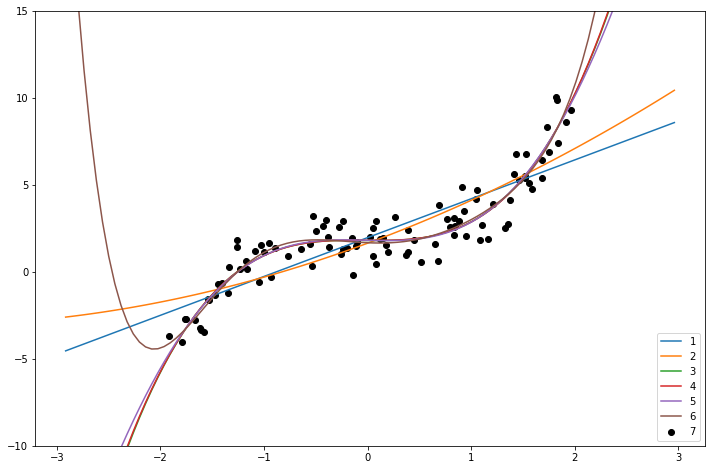

In [7]:
plt.figure(figsize=(12,8)) # set the figure size
plt.scatter(df.x, df.y, c='k', label='data') # draw the scatter picture, df.x as x axis and df.y as y.axis, color is black, lable name is "data"
def poly(x,n):
    X = np.zeros((x.size,n+1));
    for i in range(X.shape[1]):
        X[:,i] = x**i
    return X
    
xmin, xmax = df.x.min(), df.x.max() # calculate the min and max of df.x
x = np.linspace(xmin-1, xmax+1, 100)  # divide [xmin-1, xmax+1] evenly into 100 segement saved as x

for n in range(1,7): # for loop, n from 1 to 6
    X = poly(df.x, n) #  call the function ser with x=df.x and n=n
    b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(df.y) # using least square to estimate the coffeicient
    mse = np.square(X.dot(b)-df.y).mean() # calculatet the Mean squared error
    y = poly(x,n).dot(b) # generate the predicted value
    plt.plot(x, y, '-', label=mse); # plot the prediction
    
plt.ylim(-10,15) # set y axis from -10 to 15
plt.legend(['1','2','3','4','5','6','7']); # show the legend
#plt.legend()

#### Problem 2.6
What value of n would be your preference and why? (2 pts)
#### Answer:
I will use n = 3, since when n >= 3, they have almost the same performance, and therefore, we choose the model with the mininum number of variables, which is n = 3